<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#やりたいこと" data-toc-modified-id="やりたいこと-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>やりたいこと</a></span></li><li><span><a href="#データ考察" data-toc-modified-id="データ考察-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>データ考察</a></span><ul class="toc-item"><li><span><a href="#降車ポイントが不明なデータを削除" data-toc-modified-id="降車ポイントが不明なデータを削除-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>降車ポイントが不明なデータを削除</a></span></li></ul></li><li><span><a href="#タクシーIDでグルーピング" data-toc-modified-id="タクシーIDでグルーピング-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>タクシーIDでグルーピング</a></span><ul class="toc-item"><li><span><a href="#タクシーID毎に乗車数をカウント" data-toc-modified-id="タクシーID毎に乗車数をカウント-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>タクシーID毎に乗車数をカウント</a></span></li><li><span><a href="#乗車時間が長いドライバーでソート" data-toc-modified-id="乗車時間が長いドライバーでソート-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>乗車時間が長いドライバーでソート</a></span></li><li><span><a href="#優良ドライバー候補の抽出" data-toc-modified-id="優良ドライバー候補の抽出-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>優良ドライバー候補の抽出</a></span></li></ul></li><li><span><a href="#TAXI_ID-=-20000904-（乗車時間が最も長い）で考察" data-toc-modified-id="TAXI_ID-=-20000904-（乗車時間が最も長い）で考察-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>TAXI_ID = 20000904 （乗車時間が最も長い）で考察</a></span><ul class="toc-item"><li><span><a href="#乗降地点" data-toc-modified-id="乗降地点-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>乗降地点</a></span></li></ul></li><li><span><a href="#TAXI_ID-=-20000403-（乗車回数が最も多い）で考察" data-toc-modified-id="TAXI_ID-=-20000403-（乗車回数が最も多い）で考察-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>TAXI_ID = 20000403 （乗車回数が最も多い）で考察</a></span><ul class="toc-item"><li><span><a href="#乗降地点" data-toc-modified-id="乗降地点-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>乗降地点</a></span></li></ul></li><li><span><a href="#TAXI_ID-=-20000521-（新人）で考察" data-toc-modified-id="TAXI_ID-=-20000521-（新人）で考察-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>TAXI_ID = 20000521 （新人）で考察</a></span></li><li><span><a href="#TAXI_ID-=-20000440-（中堅）で考察" data-toc-modified-id="TAXI_ID-=-20000440-（中堅）で考察-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>TAXI_ID = 20000440 （中堅）で考察</a></span></li><li><span><a href="#TAXI_ID-=-20000380-(中堅）で考察" data-toc-modified-id="TAXI_ID-=-20000380-(中堅）で考察-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>TAXI_ID = 20000380 (中堅）で考察</a></span></li><li><span><a href="#分析方針" data-toc-modified-id="分析方針-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>分析方針</a></span></li><li><span><a href="#乗車率の算出" data-toc-modified-id="乗車率の算出-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>乗車率の算出</a></span><ul class="toc-item"><li><span><a href="#乗車率の定義" data-toc-modified-id="乗車率の定義-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>乗車率の定義</a></span></li></ul></li></ul></div>

## やりたいこと
- 予測アプリ
    - 緯度・軽度を分割する。
    - 分割したエリアに乗車・降車ポイントをgooglemap上にプロット
    - 分割したエリアの当日における15分単位の乗車確立を図示する。(ディープラーニングで2値問題の確立はだせる）
        - 何をデータに食わせるか？（1年間の全データ？15分刻みのデータ？）
        - 分割したエリアの当日における15分単位の乗車確立を図示する。(ディープラーニングで2値問題の確立はだせる）
    - 分割したエリアで乗車した場合の予測乗車時間を図示する。(ディープラーニングで回帰予測はできるの？）
    - 分割したエリアで乗車した場合の予測進路を8種類で図示する。（乗車、降車の教師データから方向はだせて、ディープラーニングで予測できる）

- クラスタリング
    - 優良ドライバーと新人ドライバーの比較ではなく、顧客を分析した方が良いか？
        - どう分類する？

## データ考察

In [ ]:
# Google Map上にプロットするライブラリ
# !pip install gmplot

In [1]:
import pandas as pd 
import numpy as np
import re
import copy
from datetime import datetime as dt
from gmplot import gmplot

from matplotlib import pyplot as plt
import seaborn as sns

# warningの抑止
import warnings
warnings.filterwarnings('ignore')

# メモリ解放
import gc

In [2]:
pd.set_option("display.max_columns", 30)

# データを読み込む
df = pd.read_csv("data/edit_train.csv")

df.head()

,TIMESTAMP,year,month,day,weekday,hour,minute,second,TAXI_ID,TRIP_ID,holiday,riding_time,distance,start_x,start_y,end_x,end_y,DAY_TYPE,CALL_TYPE,ORIGIN_STAND,ORIGIN_CALL,MISSING_DATA
0,1372636853,2013,7,1,mon,0,0,53,20000380,1372636853620000380,o,375,2.395003,-8.610291,41.140746,-8.605890,41.145345,A,C,NaN,NaN,False
1,1372636854,2013,7,1,mon,0,0,54,20000520,1372636854620000520,o,645,10.114430,-8.574678,41.151951,-8.607996,41.142915,A,C,NaN,NaN,False
2,1372636858,2013,7,1,mon,0,0,58,20000589,1372636858620000589,o,345,3.186095,-8.618643,41.141412,-8.630838,41.154489,A,C,NaN,NaN,False
3,1372636875,2013,7,1,mon,0,1,15,20000233,1372636875620000233,o,330,2.549688,-8.619894,41.148009,-8.609490,41.157351,A,C,NaN,NaN,False
4,1372636896,2013,7,1,mon,0,1,36,20000360,1372636896620000360,o,645,10.080812,-8.617599,41.146137,-8.636625,41.169141,A,C,NaN,NaN,False


### 降車ポイントが不明なデータを削除

In [3]:
# 降車ポイント
df[df["MISSING_DATA"] != False].index.values

array([ 104067,  294440,  449138,  725070,  768531,  832720,  914053,
       1397905])

In [4]:
df.drop(df[df["MISSING_DATA"] != False].index.values, inplace=True)
df[df["MISSING_DATA"] != False].shape[0]

0

In [5]:
df.shape

(1674152, 22)

## タクシーIDでグルーピング

In [6]:
group_taxi_id = df.groupby("TAXI_ID")

### タクシーID毎に乗車数をカウント

In [7]:
driving_count = group_taxi_id.size().sort_values(ascending=False)
driving_count[:5]

TAXI_ID
20000403    7853
20000483    7651
20000364    7430
20000307    7313
20000621    7256
dtype: int64

In [8]:
# ４分位の外れ値を探す
Q1 = driving_count.describe()['25%']
Q3 = driving_count.describe()['75%']

IQR = Q3 - Q1
threshold_max = Q3 + 1.5 * IQR
threshold_mim = Q1 - 1.5 * IQR

Q1, Q3, threshold_max,threshold_mim

(2689.75, 4927.25, 8283.5, -666.5)

__乗車回数の外れ値はない。__

### 乗車時間が長いドライバーでソート

In [9]:
driving_time = group_taxi_id.sum()["riding_time"].sort_values(ascending=False)
driving_time[:5]

# 度数分布を表示したいが・・・
# sns.barplot(x=driving_time.index, y=driving_time.values, data=driving_time)

TAXI_ID
20000904    7129620.0
20000129    6046500.0
20000307    5823270.0
20000529    5530095.0
20000276    5198760.0
Name: riding_time, dtype: float64

In [10]:
# ４分位の外れ値を探す
Q1 = driving_time.describe()['25%']
Q3 = driving_time.describe()['75%']

IQR = Q3 - Q1
threshold_max = Q3 + 1.5 * IQR
threshold_mim = Q1 - 1.5 * IQR

Q1, Q3, threshold_max,threshold_mim

(2068083.75, 3650463.75, 6024033.75, -305486.25)

__乗車時間の上限に外れ値がある。   
乗車回数に外れ値がなく、乗車時間の上限が異常値という事は、優良ドライバーの可能性が高い。__

### 優良ドライバー候補の抽出

In [11]:
# 優良ドライバー
driving_time[driving_time.values > 6024033]

TAXI_ID
20000904    7129620.0
20000129    6046500.0
Name: riding_time, dtype: float64

## TAXI_ID = 20000904 （乗車時間が最も長い）で考察

In [12]:
df_20000904 = df[df["TAXI_ID"] == 20000904]
df_20000904.shape

(4933, 22)

乗車回数は 4933 75%タイルの乗車回数（4927.25）よりもちょっと多い位。

### 乗降地点

緯度・経度はDEG形式（度だけで表記）    
- 1度は111km、故に0.1度は11.1km。

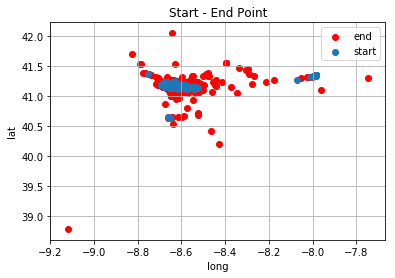

In [34]:
plt.scatter(df_20000904["end_x"], df_20000904["end_y"], color="r", label='end')
plt.scatter(df_20000904["start_x"], df_20000904["start_y"], label='start')
plt.title("Start - End Point")
plt.xlabel("long")
plt.ylabel("lat")
plt.legend()
plt.grid()

In [23]:
# distanceはkm、riding_timeは秒
df_20000904.describe()[["distance", "riding_time"]]

,distance,riding_time
count,4933.000000,4933.000000
mean,14.620715,1445.290898
std,24.685529,2096.517645
min,0.001412,30.000000
25%,3.501274,600.000000
50%,8.598231,1035.000000
75%,21.511891,1560.000000
max,659.568580,46800.000000


In [15]:
df_20000904.shape

(4933, 22)

## TAXI_ID = 20000403 （乗車回数が最も多い）で考察

In [26]:
df_20000403 = df[df["TAXI_ID"] == 20000403]
driving_time.loc[20000403]

4614780.0

乗車時間　4614780。0 は 75%1タイル (3650463.75)よりは長い。   
乗車回数で、乗車時間を稼ぐタイプ

### 乗降地点

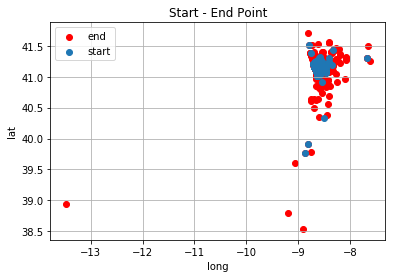

In [35]:
plt.scatter(df_20000403["end_x"], df_20000403["end_y"], color="r", label='end')
plt.scatter(df_20000403["start_x"], df_20000403["start_y"], label='start')
plt.title("Start - End Point")
plt.xlabel("long")
plt.ylabel("lat")
plt.legend()
plt.grid()

In [18]:
# distanceはkm、riding_timeは秒
df_20000403.describe()[["distance", "riding_time"]]

,distance,riding_time
count,7853.000000,7853.000000
mean,6.345105,587.645486
std,12.853535,561.509462
min,0.000000,30.000000
25%,1.889257,270.000000
50%,3.817476,480.000000
75%,7.150244,750.000000
max,594.718758,13110.000000


## TAXI_ID = 20000521 （新人）で考察

In [29]:
df_20000521 = df[df["TAXI_ID"] == 20000521]
df_20000521.shape, driving_time.loc[20000521]

((1966, 22), 1261005.0)

乗車回数＝1966、乗車時間＝1261005.0　共に25%タイル（2689.75回、2068083.75秒）共に下回る新人の場合

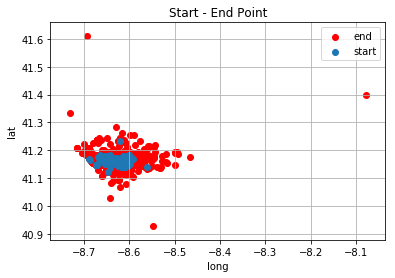

In [36]:
plt.scatter(df_20000521["end_x"], df_20000521["end_y"], color="r", label='end')
plt.scatter(df_20000521["start_x"], df_20000521["start_y"], label='start')
plt.title("Start - End Point")
plt.xlabel("long")
plt.ylabel("lat")
plt.legend()
plt.grid()

In [21]:
# distanceはkm、riding_timeは秒
df_20000521.describe()[["distance", "riding_time"]]

,distance,riding_time
count,1966.000000,1966.000000
mean,5.051573,641.406409
std,4.190691,358.026423
min,0.006233,30.000000
25%,2.735420,420.000000
50%,4.114161,570.000000
75%,6.044123,761.250000
max,88.808999,4560.000000


## TAXI_ID = 20000440 （中堅）で考察

In [22]:
driving_count.describe()['50%'],driving_time.describe()['50%']

(3702.0, 2766832.5)

In [23]:
driving_count[driving_count.values < 3702].head(3)

TAXI_ID
20000201    3692
20000440    3690
20000549    3685
dtype: int64

In [40]:
df_20000440 = df[df["TAXI_ID"] == 20000440]
df_20000440.shape, driving_time.loc[20000440]

((3690, 22), 2752170.0)

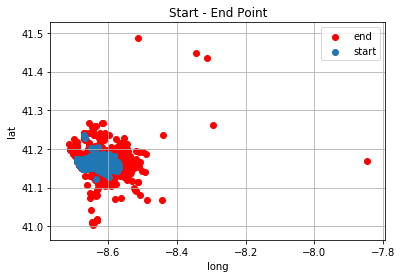

In [41]:
plt.scatter(df_20000440["end_x"], df_20000440["end_y"], color="r", label='end')
plt.scatter(df_20000440["start_x"], df_20000440["start_y"], label='start')
plt.title("Start - End Point")
plt.xlabel("long")
plt.ylabel("lat")
plt.legend()
plt.grid()

In [26]:
# distanceはkm、riding_timeは秒
df_20000440.describe()[["distance", "riding_time"]]

,distance,riding_time
count,3690.000000,3690.000000
mean,5.664773,745.845528
std,5.478029,556.322336
min,0.000000,30.000000
25%,2.613150,450.000000
50%,4.006829,630.000000
75%,6.876342,896.250000
max,117.942916,7755.000000


## TAXI_ID = 20000380 (中堅）で考察

In [42]:
df_20000380 = df[df["TAXI_ID"] == 20000380]
df_20000380.shape, driving_time.loc[20000380]

((3522, 22), 2484480.0)

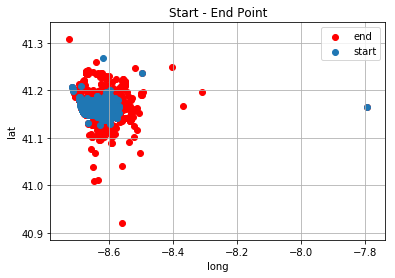

In [43]:
plt.scatter(df_20000380["end_x"], df_20000380["end_y"], color="r", label="end")
plt.scatter(df_20000380["start_x"], df_20000380["start_y"], label="start")
plt.title("Start - End Point")
plt.xlabel("long")
plt.ylabel("lat")
plt.legend()
plt.grid()

In [44]:
# distanceはkm、riding_timeは秒
df_20000380.describe()[["distance", "riding_time"]]

,distance,riding_time
count,3522.000000,3522.000000
mean,5.871538,705.417376
std,5.813101,521.647894
min,0.002824,30.000000
25%,2.896307,435.000000
50%,4.567188,615.000000
75%,7.337904,855.000000
max,172.661045,15615.000000


## 分析方針

１.全ドライバーの移動距離と乗車時間と乗車回数の合計を算出  
２.乗車時間と乗車回数の２軸でプロット  
３.クラスタリング  
４.  

乗車時間／乗車回数　で優良ドライバーを特定


タクシーの料金は、初乗り運賃の時点から「距離」と「時間」を併用。

タクシーの料金は基本的に一定距離内の初乗り運賃（例：東京：最長1.052kmまで、上限410円）
を越えて乗車した場合の走行距離に応じた「距離制」で計算されるが、走行速度が10km/h以下になった場合には、走行時間を距離に置き換えて計算する「時間距離併用制」が適用される。


## 乗車率の算出

### 乗車率の定義
1日の乗車時間（秒）/ 24 * 60 * 60(秒）    

※日跨ぎで働くドライバーでも1日の稼働時間は同じという前提。   
例）9-18（8h）、22-25(1h）＋ 10-15(5h）＋22-25(2h）　


In [30]:
def calc_working_rate(arr: np.ndarray):
    
    # 24 * 60 * 60 = 86400
    return ( arr.sum() / 86400) * 100

In [31]:
24 * 60 * 60

86400